# Data Preprocessing

#### 🎯 Learning Goals

1. Understand and implement **standardization**.
2. Understand and implement **min-max** preprocessing.
3. Understand and implement **non-linear** preprocessing strategies.
4. Understand and deal with **outliers** and **missing** data.

In [16]:
# Load our libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_regression

# Use a nicer style for plots
plt.style.use("seaborn-v0_8-muted")

Many learning algorithms, including linear models, benefit from the preprocessing of the data set.
Predictor preprocessing impacts the convergence rates of SGD for example (as you will see later on).
In the first part of the notebook you will use preprocessing techniques and will see how the preprocessign can help in the data analysis. 
In the second part, you will learn more about how to deal with outliers and missing data in messy real-world data.
_________

### The Ames Housing Dataset

The **Ames Housing Dataset** is widely used in machine learning and data analysis. It contains detailed information about residential properties in Ames, Iowa, USA, including a variety of features that describe each home (e.g., size, number of rooms, year built). This dataset is commonly employed in regression tasks, where the goal is to predict housing prices based on the available attributes. We first load the data and inspect the available information.

In [17]:
df_houses = pd.read_csv("data/houses.csv")
df_houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 34 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   MSSubClass     1460 non-null   int64
 1   LotArea        1460 non-null   int64
 2   OverallQual    1460 non-null   int64
 3   OverallCond    1460 non-null   int64
 4   YearBuilt      1460 non-null   int64
 5   YearRemodAdd   1460 non-null   int64
 6   BsmtFinSF1     1460 non-null   int64
 7   BsmtFinSF2     1460 non-null   int64
 8   BsmtUnfSF      1460 non-null   int64
 9   TotalBsmtSF    1460 non-null   int64
 10  1stFlrSF       1460 non-null   int64
 11  2ndFlrSF       1460 non-null   int64
 12  LowQualFinSF   1460 non-null   int64
 13  GrLivArea      1460 non-null   int64
 14  BsmtFullBath   1460 non-null   int64
 15  BsmtHalfBath   1460 non-null   int64
 16  FullBath       1460 non-null   int64
 17  HalfBath       1460 non-null   int64
 18  BedroomAbvGr   1460 non-null   int64
 19  Kitche

## Standardization

When we standardize feature $x$, we subtract the mean and divide by the standard deviation, i.e. for all observations $i \in \{1, \cdots, n \}$, we compute

$$x^{(i)} = \frac{x^{(i)}_k- \frac{1}{n} \sum_{i= 1}^nx^{(i)}}{\sqrt{\frac{1}{n}\sum_{i=1}^n(x^{(i)}_k - \frac{1}{n} \sum_{i= 1}^nx^{(i)}_k)^2}}$$

#### ➡️ ✏️ Task 1 

Complete the function below, which takes a pandas Series and standardizes it. Call the function to standardize house prices. Make an overlaying histogram of house prices prior and post to standardizing. What do you observe? Compute appropriate statistics to check that the standardization was successful.

In [18]:
# Your solution

def standardize(df_col):
    # TODO Standardize
    pass

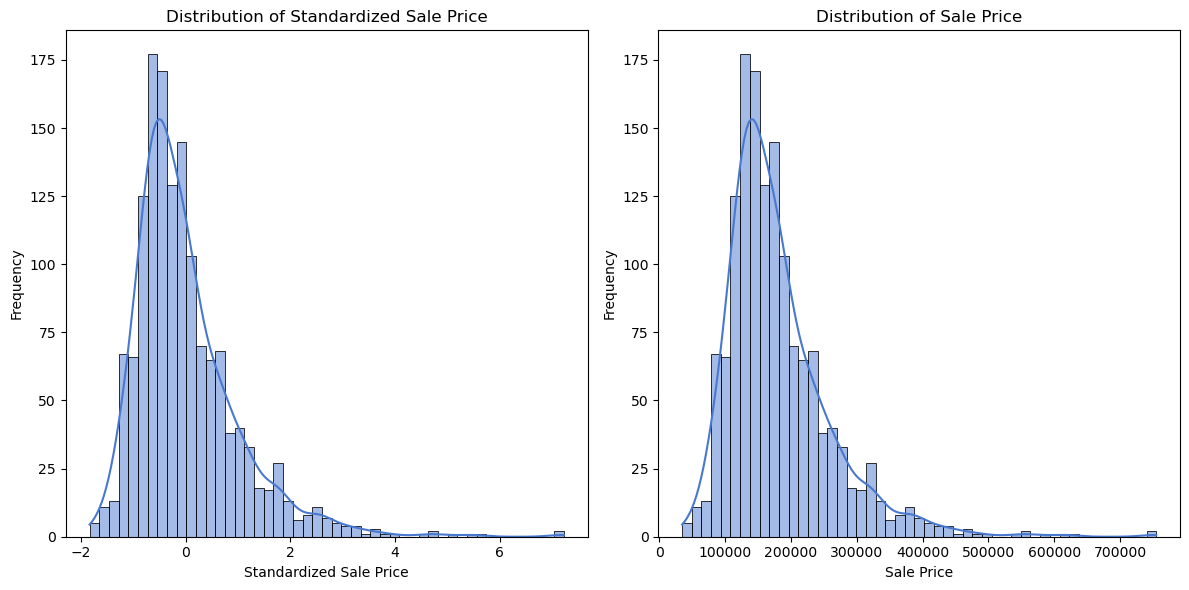

In [19]:
# TODO Delete solution

def standardize(df):
    df = (df - df.mean(axis=0)) / (df.std(axis=0))
    return df

df_houses["SalePrice_stand"] = standardize(df_houses["SalePrice"])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot standardized SalePrice
sns.histplot(df_houses["SalePrice_stand"], ax=ax[0], kde=True)
ax[0].set_title("Distribution of Standardized Sale Price")
ax[0].set_xlabel("Standardized Sale Price")
ax[0].set_ylabel("Frequency")

# Plot original SalePrice
sns.histplot(df_houses["SalePrice"], ax=ax[1], kde=True)
ax[1].set_title("Distribution of Sale Price")
ax[1].set_xlabel("Sale Price")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [20]:
# Can run describe

df_houses[["SalePrice_stand"]].describe()

,SalePrice_stand
count,1.460000e+03
mean,1.314017e-16
std,1.000000e+00
min,-1.838074e+00
25%,-6.412965e-01
50%,-2.255870e-01
75%,4.163867e-01
max,7.226343e+00


_________
## Min-Max Normalization

Min-Max normalization re-scales the sample distribution of the features to lie between 0 and 1, i.e.

$$x^{(i)} = \frac{x^{(i)}_k - \min(x^{(i)}_k)_{i=1}^n}{\max(x^{(i)}_k)_{i=1}^n - \min(x^{(i)}_k)_{i=1}^n}$$

#### ➡️ ✏️ Task 2

Comple the function below to implement max-min normalization and plot a histogram. Compute appropriate statistics to check that the standardization was successful.

In [21]:
# Your solution 
def max_min_norm(df):
    pass

In [22]:
# TODO Delete Solution

def max_min_norm(df):
    df = (df - df.min(axis=0)) / (df.max(axis=0) - df.min(axis=0))
    return df

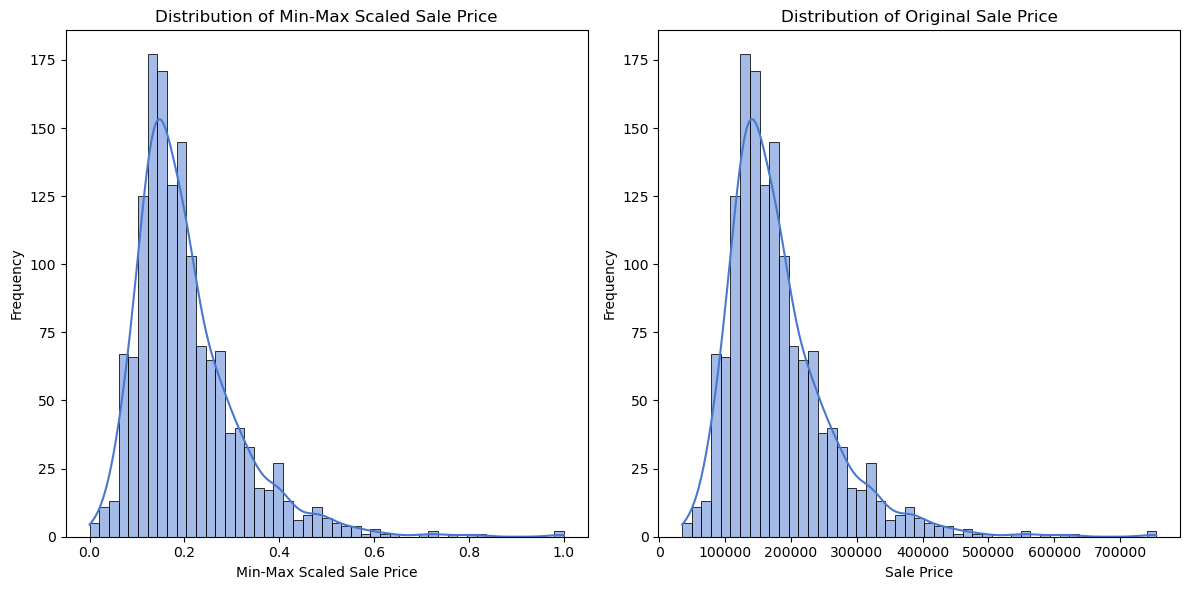

In [23]:
df_houses["SalePrice_maxmin"] = max_min_norm(df_houses["SalePrice"])

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot min-max scaled SalePrice
sns.histplot(df_houses["SalePrice_maxmin"], ax=ax[0], kde=True)
ax[0].set_title("Distribution of Min-Max Scaled Sale Price")
ax[0].set_xlabel("Min-Max Scaled Sale Price")
ax[0].set_ylabel("Frequency")

# Plot original SalePrice
sns.histplot(df_houses["SalePrice"], ax=ax[1], kde=True)
ax[1].set_title("Distribution of Original Sale Price")
ax[1].set_xlabel("Sale Price")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

In [24]:
# Can run describe

df_houses[["SalePrice_maxmin"]].describe()

,SalePrice_maxmin
count,1460.000000
mean,0.202779
std,0.110321
min,0.000000
25%,0.132030
50%,0.177892
75%,0.248715
max,1.000000


## Quantile Transforms

**Quantile transforms** is a technique used to map the features of a dataset into a desired distribution, typically smoothing out unusual patterns in the data.

#### Recap:
- A **quantile transform** applies the following transformation:
  
  $G^{-1}(F(x))$,
  
  where:
  - $F$ is the cumulative distribution function (CDF).
  - $G^{-1}$ is the quantile function (or inverse CDF) of the target distribution.

- If $X$ is a random variable with a continuous CDF $F$, then the transformed values $F(X)$ are uniformly distributed between 0 and 1.

- If $U$ is uniformly distributed on $[0, 1]$, applying the inverse CDF of $G$, i.e., $G^{-1}(U)$, results in a distribution matching $G$.


#### ➡️ ✏️ Task 3

Complete the code and apply the quantile transforms method. What do you observe?

In [25]:
# Your solution here

Transformer_uniform = QuantileTransformer(n_quantiles=1000, output_distribution="uniform",
                    ignore_implicit_zeros=False, subsample=10000)
Transformer_normal = QuantileTransformer(n_quantiles=1000, output_distribution="normal",
                    ignore_implicit_zeros=False, subsample=10000)

df_houses["SalePrice_quni"] = Transformer_uniform.fit_transform(df_houses[["SalePrice"]])
df_houses["SalePrice_qnorm"] = Transformer_normal.fit_transform(df_houses[["SalePrice"]])


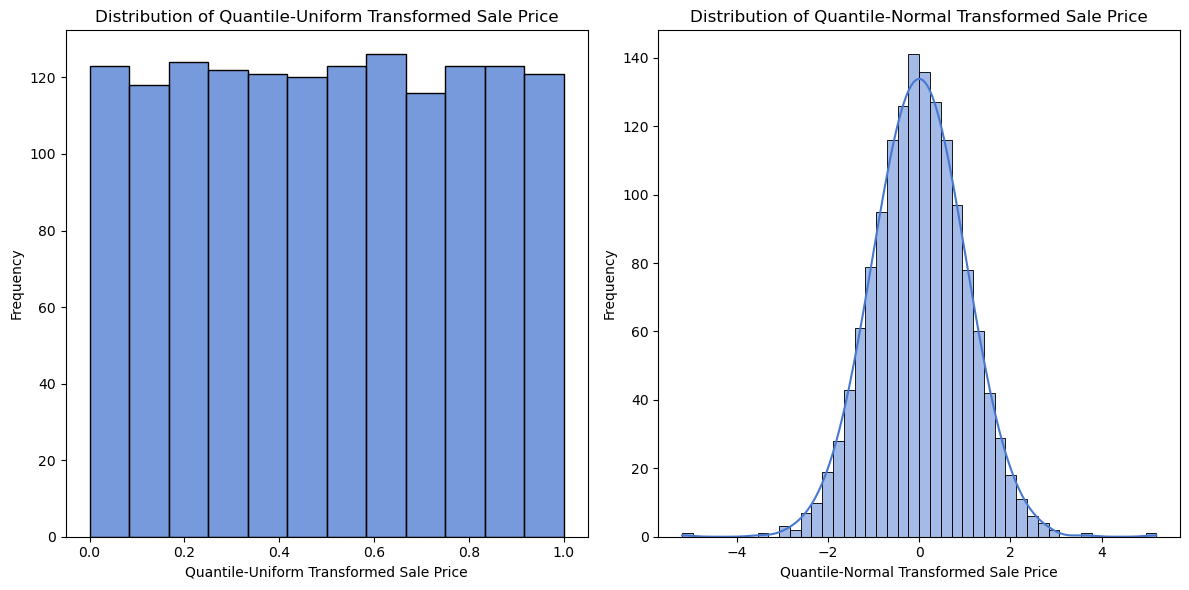

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Plot quantile-uniform transformed SalePrice
sns.histplot(df_houses["SalePrice_quni"], ax=ax[0])
ax[0].set_title("Distribution of Quantile-Uniform Transformed Sale Price")
ax[0].set_xlabel("Quantile-Uniform Transformed Sale Price")
ax[0].set_ylabel("Frequency")

# Plot quantile-normal transformed SalePrice
sns.histplot(df_houses["SalePrice_qnorm"], ax=ax[1], kde=True)
ax[1].set_title("Distribution of Quantile-Normal Transformed Sale Price")
ax[1].set_xlabel("Quantile-Normal Transformed Sale Price")
ax[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

##  Power transforms

A family of parametric, monotonic transformations that aim to map data from any distribution to approximately Gaussian, stabilize variance and minimize skewness.

#### ➡️ ✏️ Task 4

Transform the sales prices logarithmically. What kind of power transforms is the logarithmic transformation?

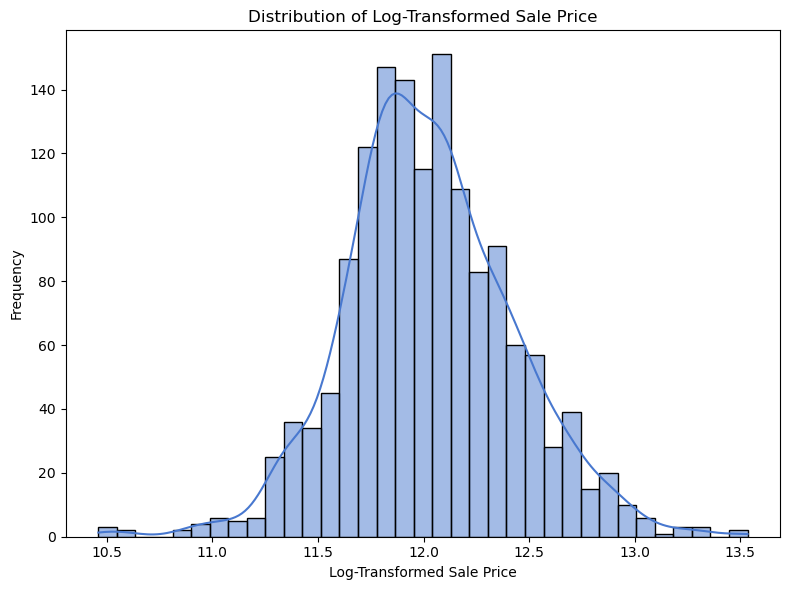

In [27]:
# Your solution

df_houses["SalePrice_log"] = np.log(df_houses["SalePrice"])

fig, ax = plt.subplots(figsize=(8, 6))

# Plot log-transformed SalePrice
sns.histplot(df_houses["SalePrice_log"], ax=ax, kde=True)
ax.set_title("Distribution of Log-Transformed Sale Price")
ax.set_xlabel("Log-Transformed Sale Price")
ax.set_ylabel("Frequency")

plt.tight_layout()
plt.show()

## Transformation in Action

#### ➡️ ✏️ Task 5

In this linear regression model, we aim to predict the Sale Price ($y_i$) using an intercept and Lot Area ($X_i$) as the predictor. The model is defined as:

$$
y_i = \beta_0 + \beta_1 X_i + \varepsilon_i
$$

where $y_i$ represents the Sale Price for the $i$-th observation, $X_i$ is the Lot Area for the $i$-th observation, $\beta_0$ is the intercept term, $\beta_1$ is the coefficient for Lot Area, and $\varepsilon_i$ is the error term, which is assumed to follow a normal distribution with mean 0 and constant variance.


Repeat the SGD analysis. This time, do not standardize the output. What do you observe?

In [28]:
def gradient(X, y, beta):
    return -2 * ((y - X.dot(beta)).reshape(-1, 1) * X).mean(axis=0)

n = X.shape[0]
X = df_houses[["LotArea"]].values
X = np.hstack((np.ones((n, 1)), X))


y = df_houses["SalePrice"].values
betas_list = []
beta = np.zeros(2)
betas_list.append(beta.flatten().copy()) 

eta = 0.01
t = 0
max_t = 10000 # Maximum number of iterations
batch_size = 1000 # Cardinality of batch size

# Set random seed for replicability
np.random.seed(123)

# Run the stochastic gradient descent algorithm
while t < max_t: # We stop after max_t iterations even if we don't converge
    t += 1
    # Randomly draw a batch of size 100 to compute the gradient
    s = np.random.choice(n, size=batch_size, replace=False)

    # Compute the gradient
    grad = gradient(X[s, :], y[s], beta)
    
    # Update the beta vector
    beta = beta - eta * grad

    # Add the new beta to the list
    betas_list.append(beta.flatten().copy())

/var/folders/pj/p1msdd8x02d1_kx54pmxh_cm0000gn/T/ipykernel_90241/1057158218.py:2: RuntimeWarning: overflow encountered in multiply
  return -2 * ((y - X.dot(beta)).reshape(-1, 1) * X).mean(axis=0)
/var/folders/pj/p1msdd8x02d1_kx54pmxh_cm0000gn/T/ipykernel_90241/1057158218.py:32: RuntimeWarning: invalid value encountered in subtract
  beta = beta - eta * grad


In [29]:
betas_list

[array([0., 0.]),
 array([3.64070930e+03, 4.27848596e+07]),
 array([-9.16442756e+09, -1.77916178e+14]),
 array([3.78693856e+16, 7.97414899e+20]),
 array([-1.67471876e+23, -3.33271384e+27]),
 array([6.88944106e+29, 1.09818730e+34]),
 array([-2.28248235e+36, -4.03025312e+40]),
 array([8.47885880e+42, 1.35135407e+47]),
 array([-2.83566649e+49, -4.76995727e+53]),
 array([1.02531320e+56, 2.16322969e+60]),
 array([-4.65248911e+62, -1.06146337e+67]),
 array([2.22351947e+69, 4.17126339e+73]),
 array([-8.87620438e+75, -2.05269128e+80]),
 array([4.28701080e+82, 8.81328672e+86]),
 array([-1.87959866e+89, -4.27023102e+93]),
 array([8.90346741e+095, 1.64598412e+100]),
 array([-3.39845727e+102, -5.69320041e+106]),
 array([1.19680126e+109, 2.69695809e+113]),
 array([-5.57283012e+115, -9.76823165e+119]),
 array([2.09331118e+122, 4.61029538e+126]),
 array([-9.73080179e+128, -2.00588242e+133]),
 array([4.27050226e+135, 8.90078236e+139]),
 array([-1.87747400e+142, -3.60130417e+146]),
 array([7.70743443e+

#### ➡️ ✏️ Task 6

Repeat the task - but this time standardize the data.

In [30]:
# Now with the normalized values

X = standardize(df_houses[["LotArea"]])
X = X.values
n = X.shape[0]
y = standardize(df_houses["SalePrice"]).values
betas_list = []
beta = np.zeros(1)
betas_list.append(beta.flatten().copy()) 

eta = 0.01
t = 0
max_t = 10000 # Maximum number of iterations
batch_size = 1000 # Cardinality of batch size

# Set random seed for replicability
np.random.seed(123)

# Run the stochastic gradient descent algorithm
while t < max_t: # We stop after max_t iterations even if we don't converge
    t += 1
    # Randomly draw a batch of size 100 to compute the gradient
    s = np.random.choice(n, size=batch_size, replace=False)

    # Compute the gradient
    grad = gradient(X[s, :], y[s], beta)
    
    # Update the beta vector
    beta = beta - eta * grad

    # Add the new beta to the list
    betas_list.append(beta.flatten().copy())

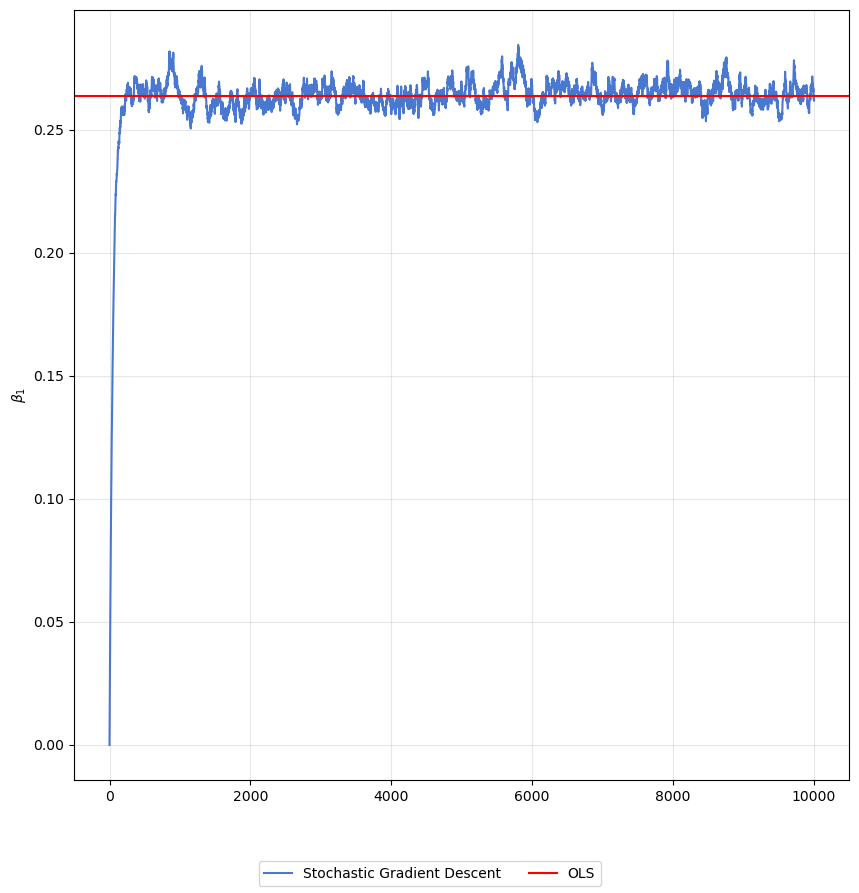

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

beta_ols = np.linalg.inv(X.T @ X) @ X.T @ y # Compute the OLS solution
i = 0
ax.plot([beta for beta in betas_list], label=("Stochastic Gradient Descent"))
ax.axhline(beta_ols, color="red", label=("OLS"""))
ax.set_ylabel("$\\beta_1$")
ax.grid(alpha=0.3)

# Creating a single legend for the figure
fig.legend(loc='lower center', ncol=2)
plt.show()

#### ➡️ ✏️ Task 6

Run the regression below with the transformed and non-transformed version. For the regressors focus on numeric feature as specified in the X variable and make sure to standardize them. How does the predictive capacity change?

In [32]:
# Your solution

X = ['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
     'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
     '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
     'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
     'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
     'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
     'MiscVal', 'MoSold', 'YrSold']
df_houses[X] = standardize(df_houses[X])

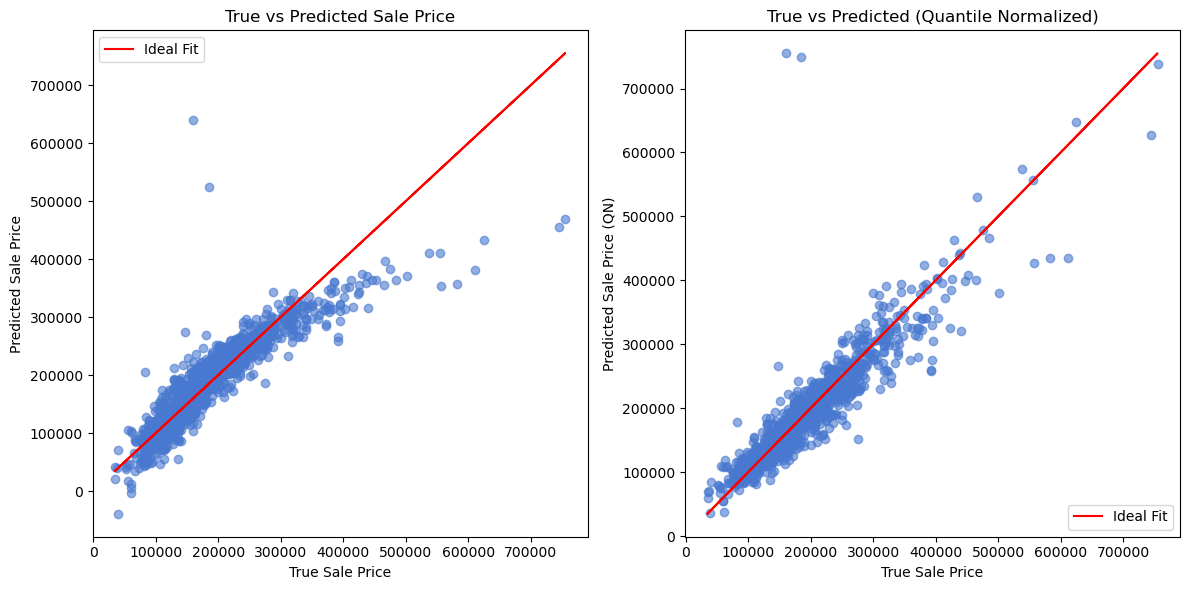

In [33]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(df_houses[X], df_houses["SalePrice"])
y_pred = lin_model.predict(df_houses[X]).copy()

lin_model.fit(df_houses[X], df_houses["SalePrice_qnorm"])
temp = lin_model.predict(df_houses[X]).reshape(-1, 1)
temp = pd.DataFrame(temp)
temp.columns = ["SalePrice"]
y_pred_qn = Transformer_normal.inverse_transform(temp)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Left plot: True vs Predicted for original Sale Price
ax[0].scatter(df_houses["SalePrice"], y_pred,  alpha=0.6)
ax[0].plot(df_houses["SalePrice"], df_houses["SalePrice"], color="red", label="Ideal Fit")
ax[0].set_title("True vs Predicted Sale Price")
ax[0].set_xlabel("True Sale Price")
ax[0].set_ylabel("Predicted Sale Price")
ax[0].legend()

# Right plot: True vs Predicted for quantile normalized Sale Price
ax[1].scatter(df_houses["SalePrice"], y_pred_qn,  alpha=0.6)
ax[1].plot(df_houses["SalePrice"], df_houses["SalePrice"], color="red", label="Ideal Fit")
ax[1].set_title("True vs Predicted (Quantile Normalized)")
ax[1].set_xlabel("True Sale Price")
ax[1].set_ylabel("Predicted Sale Price (QN)")
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()

In [34]:
np.mean((df_houses["SalePrice"] - y_pred)**2) - np.mean((df_houses["SalePrice"] - y_pred_qn[:, 0] )**2)

151113520.04864526

## Outliers

There is no rigid universal mathematical definition of what constitutes an outlier. The idea is that an outlier is a data point that differs meaningfully from other observations. For this notebook, we adopt one formal definition of an outlier: Turkey's fence - according to which an outlier is defined as outside of the extended interquartile range 

$$\left[Q_{1}-k\left(Q_{3}-Q_{1}\right), Q_{3}+k\left(Q_{3}-Q_{1}\right)\right],$$

where $k=1.5$ is considered an outlier and $k=3$ observations far out. 

Alternatively, a graphical inspection of the data may be used to detect outliers. 

How to deal with outliers should depend on the task at hand. Statistical learning tasks can be sensitive to outliers and hence should require further action. Common approaches encompass: 

- trimming, i.e. discarding outliers
- Wincosring, i.e. replacing outliers with "nonsuspect" data.
- One can use robust statistics, such as Huber loss for regression problems.

#### ➡️ ✏️ Task 6 

Use Turkey's fence to identify outliers.

In [35]:
# Your solution

In [36]:
# Your solution
q1 = df_houses["SalePrice"].quantile(0.25)
q3 = df_houses["SalePrice"].quantile(0.75)
k = 3
outliers = df_houses[(df_houses["SalePrice"] > q3 + k*(q3-q1)) & (df_houses["SalePrice"] < q1 - k*(q3-q1))]

## Huber's loss

In this exercise, we will explore the **Huber Loss** function. 

- The **Huber Loss** combines the **mean squared error (MSE)** and **mean absolute error (MAE)**. 
- For small errors (close to zero), it behaves like the squared error, which ensures that small mistakes are penalized more, encouraging the model to be accurate.
- For larger errors, it switches to absolute error, which is less sensitive to outliers. This makes the Huber Loss robust to outliers, as it prevents large errors from dominating the loss function, unlike MSE.

#### Formula:

The **Huber Loss** is defined piecewise as:

$$
L_\delta(a) = 
\begin{cases} 
\frac{1}{2} a^2 & \text{for} \ |a| \leq \epsilon \\
\delta \cdot (|a| - \frac{1}{2}\delta) & \text{otherwise}
\end{cases}
$$

Where:
- $a$ is the residual or difference between the true and predicted values.
- $\delta$ is a tuning parameter that determines the threshold between the squared and absolute error regions.

#### ➡️ ✏️ Task 7

Your teammate has been analyzing the data for Kelley, a small town near Ames, Iowa. Like you, she preprocessed the data. In the figure below she is plotting Area versus Sale Prices. Do you observe unusual observations?

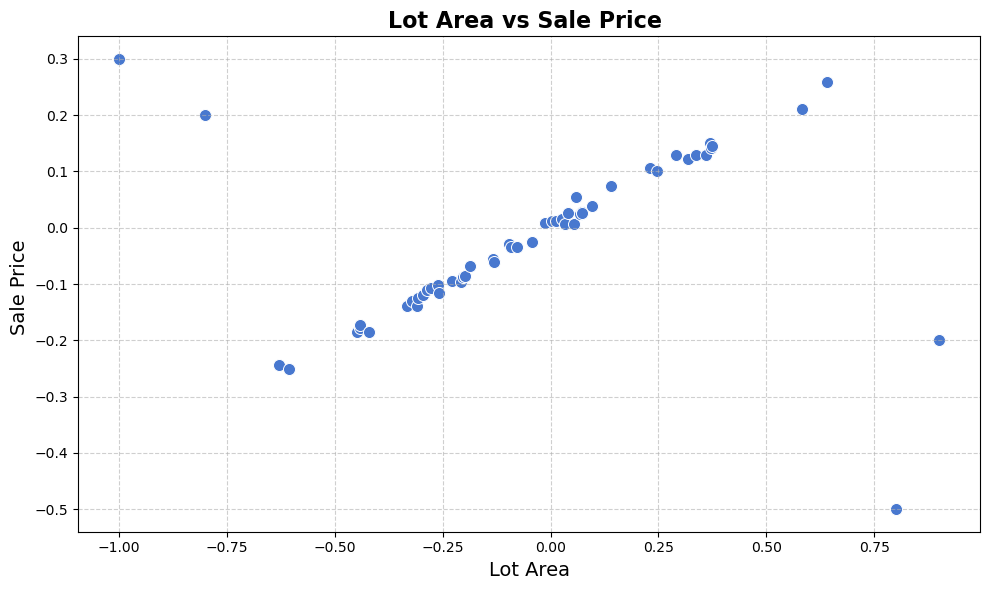

In [37]:
df_houses_k = pd.read_csv("data/houses_kelley.csv")

# Create a scatter plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot normal observations
sns.scatterplot(x='LotArea', y='SalePrice_qnorm', data=df_houses_k, 
                ax=ax, s=75)


# Add title and labels
ax.set_title("Lot Area vs Sale Price ", fontsize=16, weight='bold')
ax.set_xlabel("Lot Area", fontsize=14)
ax.set_ylabel("Sale Price ", fontsize=14)


# Enhance the aesthetics
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

#### ➡️ ✏️ Task 8

Your friend suggests using different specifications of Huber loss to see how sensitive her regression results are to outliers.  How would you interpret the output below?

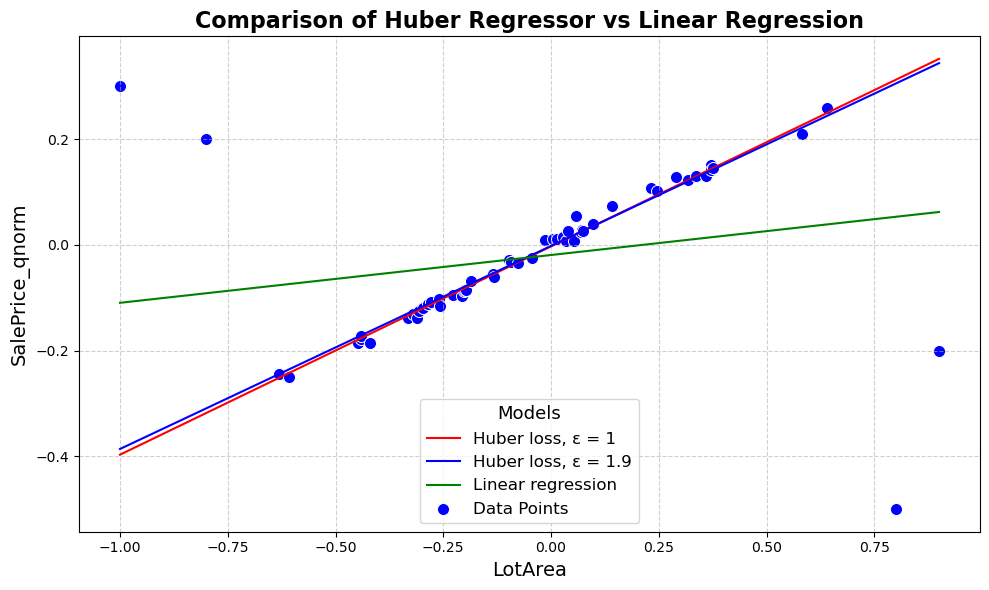

In [38]:
# Assuming 'dummy' is the dataset you're working with
X = df_houses_k[["LotArea"]]
y = df_houses_k["SalePrice_qnorm"]

# Define epsilon values for the Huber Regressor
epsilon_values = [1, 1.9]
x = np.linspace(X.min(), X.max(), 7)

# Set up the plot with Seaborn style to match the previous plot
fig, ax = plt.subplots(figsize=(10, 6))

# Colors for different epsilon values for Huber regressor
colors = ["r-", "b-", "y-", "m-"]

# Fit and plot the Huber Regressor over a series of epsilon values
for k, epsilon in enumerate(epsilon_values):
    huber = HuberRegressor(alpha=0.0, epsilon=epsilon)
    huber.fit(X, y)
    coef_ = huber.coef_ * x + huber.intercept_
    ax.plot(x, coef_, colors[k], label=f"Huber loss, ε = {epsilon}")

# Fit a Ridge Regressor to compare to Huber Regressor
ridge = LinearRegression(fit_intercept=True)
ridge.fit(X, y)
coef_ = ridge.coef_ * x + ridge.intercept_
ax.plot(x, coef_, "g-", label="Linear regression")

# Plot the actual data points
sns.scatterplot(x=X.squeeze(), y=y, ax=ax, color='blue', s=75, label='Data Points')

# Enhance the aesthetics and match previous plot
ax.set_title("Comparison of Huber Regressor vs Linear Regression", fontsize=16, weight='bold')
ax.set_xlabel("LotArea", fontsize=14)
ax.set_ylabel("SalePrice_qnorm", fontsize=14)

# Customize legend and display it
ax.legend(title="Models", title_fontsize='13', fontsize='12')

# Add a grid to the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

# Show the plot
plt.show()

## Missings

Missing values frequently occur in real-world datasets. The reasons why one does not observe the data are manifold and in general there is no universal recipe how to deal recipe how to deal with missings. In this class, we present the most simple solution - imputation of missing values via the computation of mean or median.



#### ➡️ ✏️ Task 9

For all numeric variables detect the variables, which contain missings. Write a function to replace the missings with mean or median value.

In [39]:
# Your solution

In [40]:
# TODO Delete

cols = df_houses.select_dtypes(include=['number']).columns[df_houses.select_dtypes(include=['number']).isna().sum() > 0]

def fill_missings(df_col, median=True):
    df_col = df_col.copy()
    if True:
        df_col[df_col.isna()] = df_col.median()
    else:
        df_col[df_col.isna()] = df_col.mean()
    return df_col

for col in cols:
    df_houses[f"col_new"] = fill_missings(df_houses[col])